# Diagram exporter example
This tutorial will guide you on how to download the 5 most representative diagrams given a list of genes.

## Analysis
We are going to send a list of genes to the reactome servers to analyse it. Reactome should respond with a list of pathways where these genes are present.

First, load the list of genes as raw text, since we will send as is to the server.

In [14]:
# Imports needed to run this code.
import urllib
import requests
import json
import os
from IPython.display import Image, display, HTML

In [22]:
with open('resources/gene_list.txt', 'rt') as file:
    data = file.read()

Let’s use AnalysisService to perform the analysis. In this case we are using a post service:

In [3]:
server = 'https://reactomerelease.oicr.on.ca/AnalysisService/identifiers/projection/?'
query = urllib.parse.urlencode({
    'interactors': 'false',
    # get only 5 results
    'pageSize': 5,
    'page': 1,
     # sorted using the p-value
    'sortBy': 'ENTITIES_PVALUE',
    'order': 'ASC',
    'resource': 'TOTAL'})
url = server + query
# https://reactomerelease.oicr.on.ca/AnalysisService/identifiers/projection/?interactors=false&pageSize=5&page=1&sortBy=ENTITIES_PVALUE&order=ASC&resource=TOTAL
headers = {'accept': 'application/json', 'content-type': 'text/plain'}

analysis_result = requests.post(url, data, headers=headers)

https://reactomerelease.oicr.on.ca/AnalysisService/identifiers/projection/?interactors=false&pageSize=5&page=1&sortBy=ENTITIES_PVALUE&order=ASC&resource=TOTAL


To obtain a list of the pathways we must read the response

In [8]:
response = json.loads(analysis_result.text)
# Let's check that we have the result
for pathway in response['pathways']:
    print(pathway['stId'], pathway['name'], sep='\t')

R-HSA-9006934	Signaling by Receptor Tyrosine Kinases
R-HSA-1226099	Signaling by FGFR in disease
R-HSA-8851708	Signaling by FGFR2 IIIa TM
R-HSA-5655253	Signaling by FGFR2 in disease
R-HSA-3000157	Laminin interactions


## Diagram exporter
We need a list with the stable identifiers (*stId*) and the analysis unique identifier (the *token*):

In [9]:
pathways = [pathway['stId'] for pathway in response['pathways']]
token = response['summary']['token']

Now, we have all of the information to generate the images. The diagram exporter is a GET method, no need to send data

In [10]:
server = 'https://reactomerelease.oicr.on.ca/ContentService/exporter/diagram/'
headers = {"accept": 'image/png'}
query = urllib.parse.urlencode({'quality': '7',
                                'token': token,
                                'analysisProfile': 'Copper Plus'})
ext = 'png'
# https://reactomerelease.oicr.on.ca/ContentService/exporter/diagram/R-HSA-3000157.png?quality=7&token=token&analysisProfile=Copper+Plus

In [11]:
for stId in pathways:
    diagram = stId + "." + ext
    url = server + diagram + '?' + query
    result = requests.get(url=url, headers=headers)
    
    # Save in img/R-HSA-3000157.png
    filename = os.path.join('img', diagram)
    with open(filename, 'wb') as f:
        for chunk in result:
            f.write(chunk)

And we can go to img/ to see our images. Or display them into the notebook

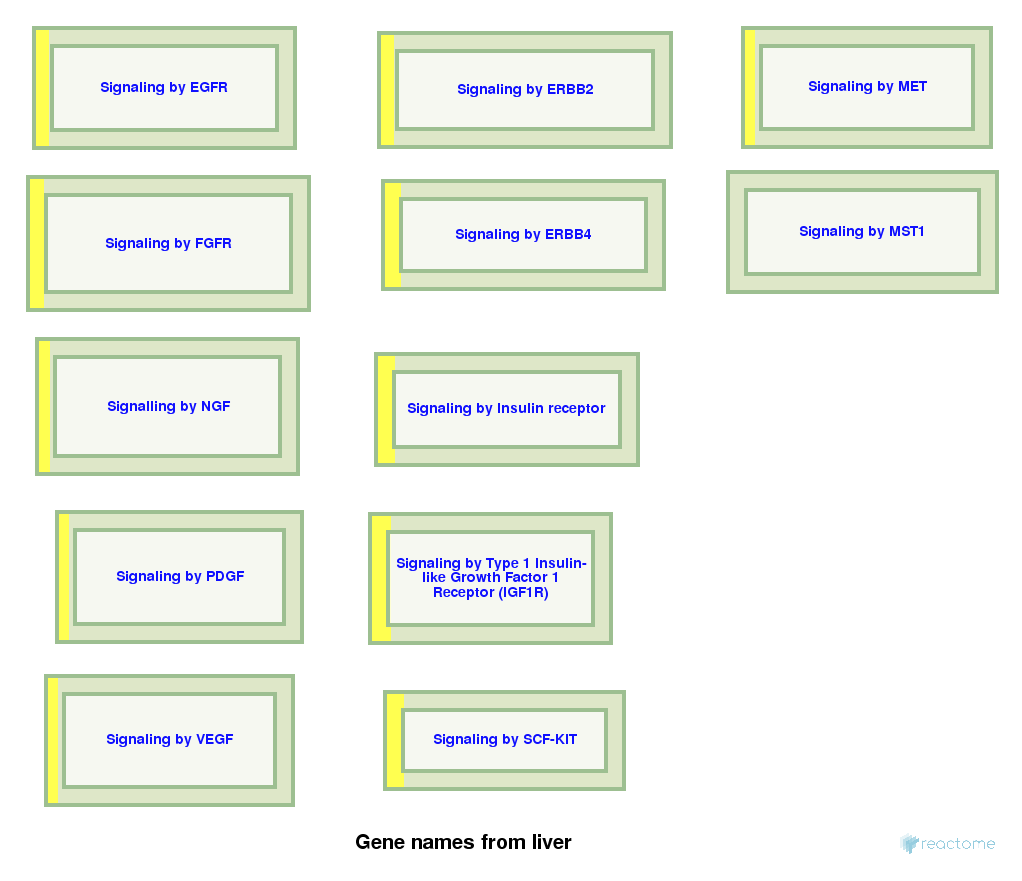

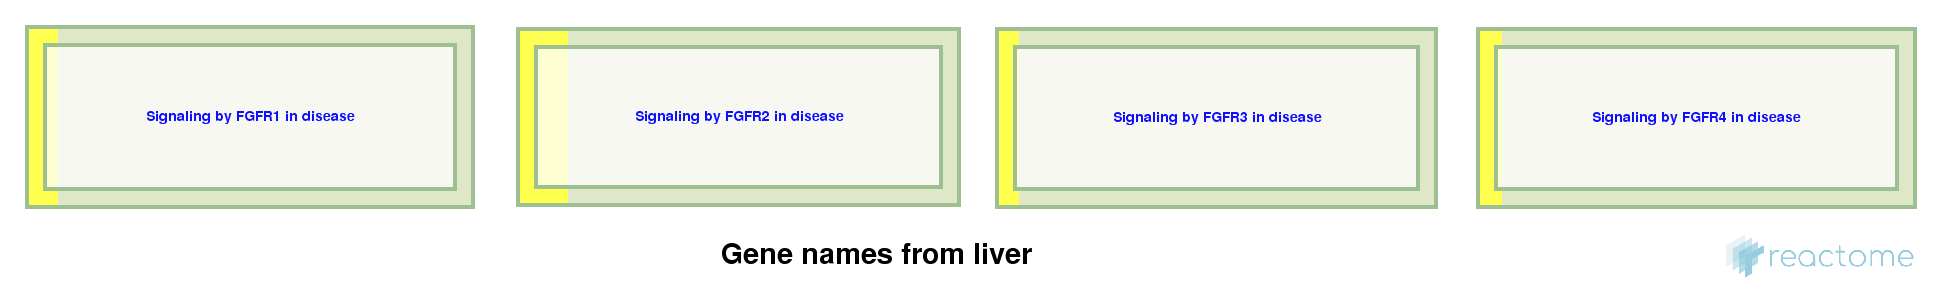

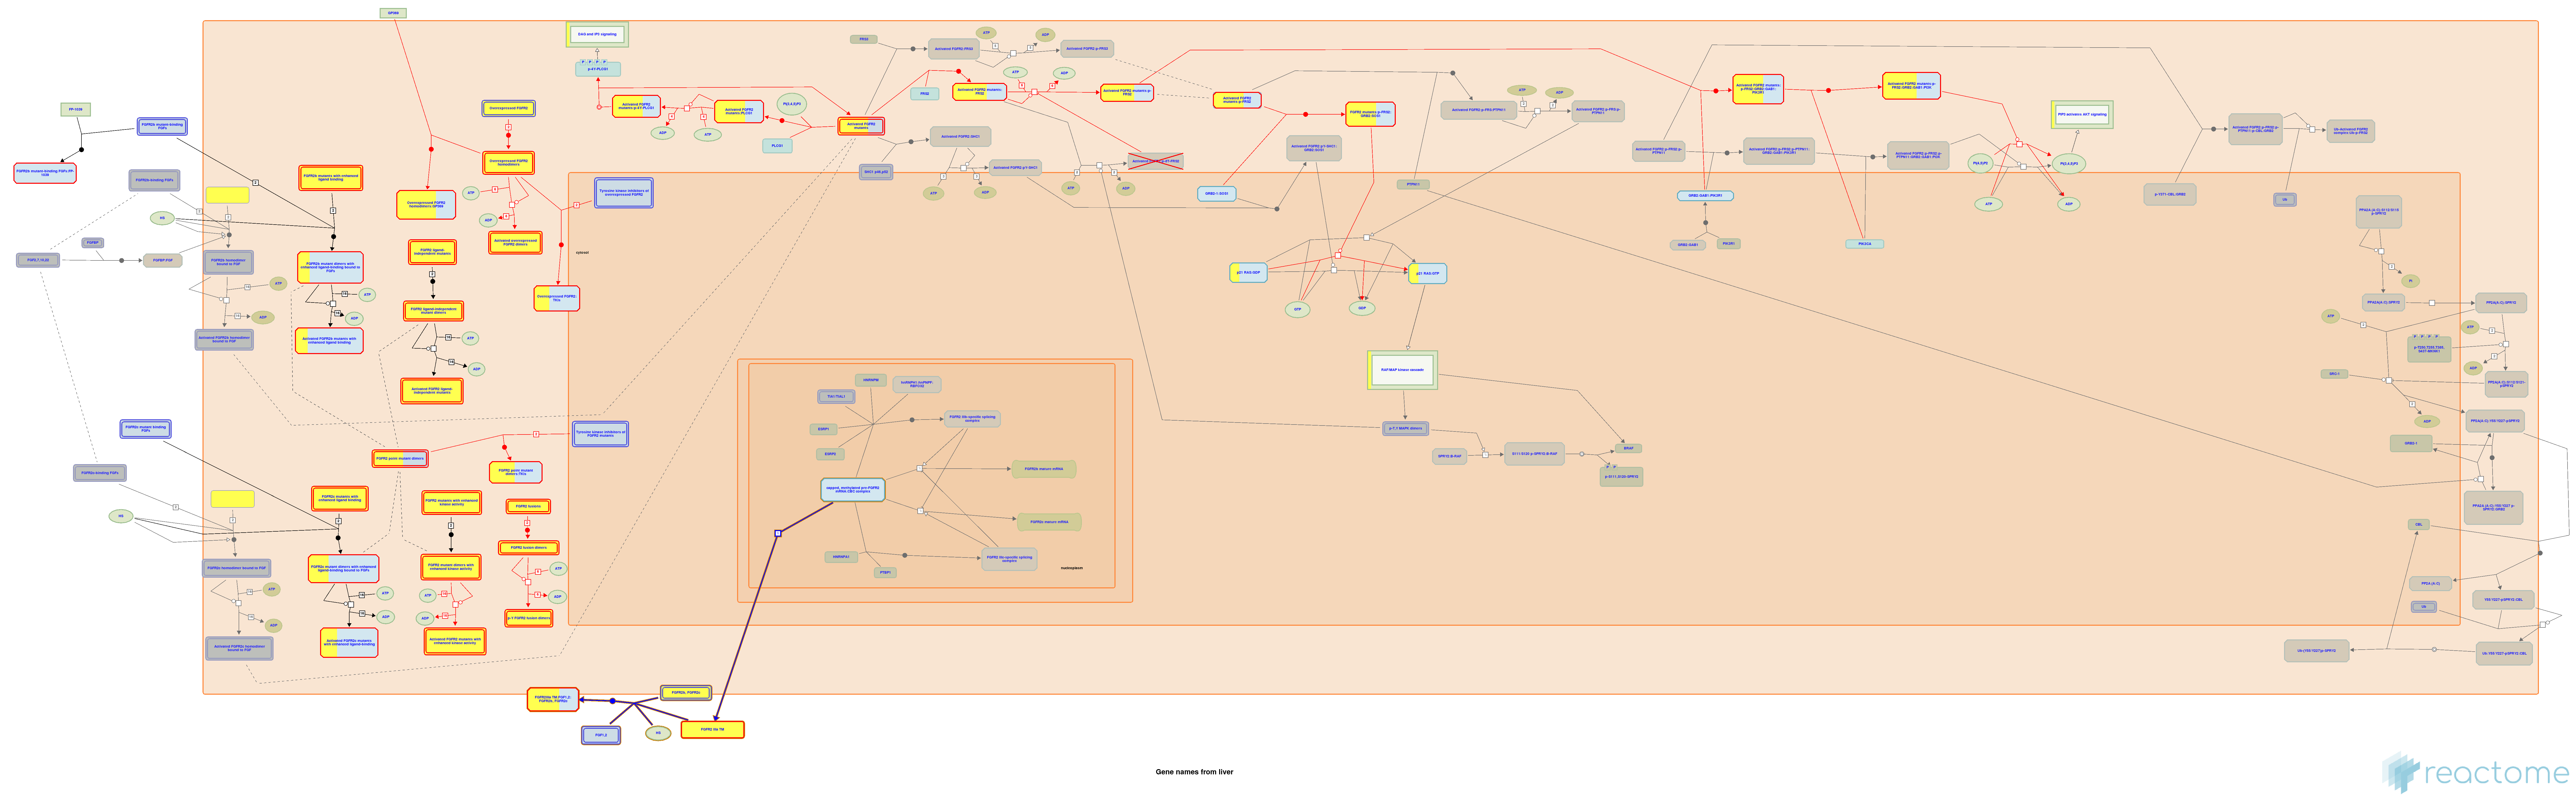

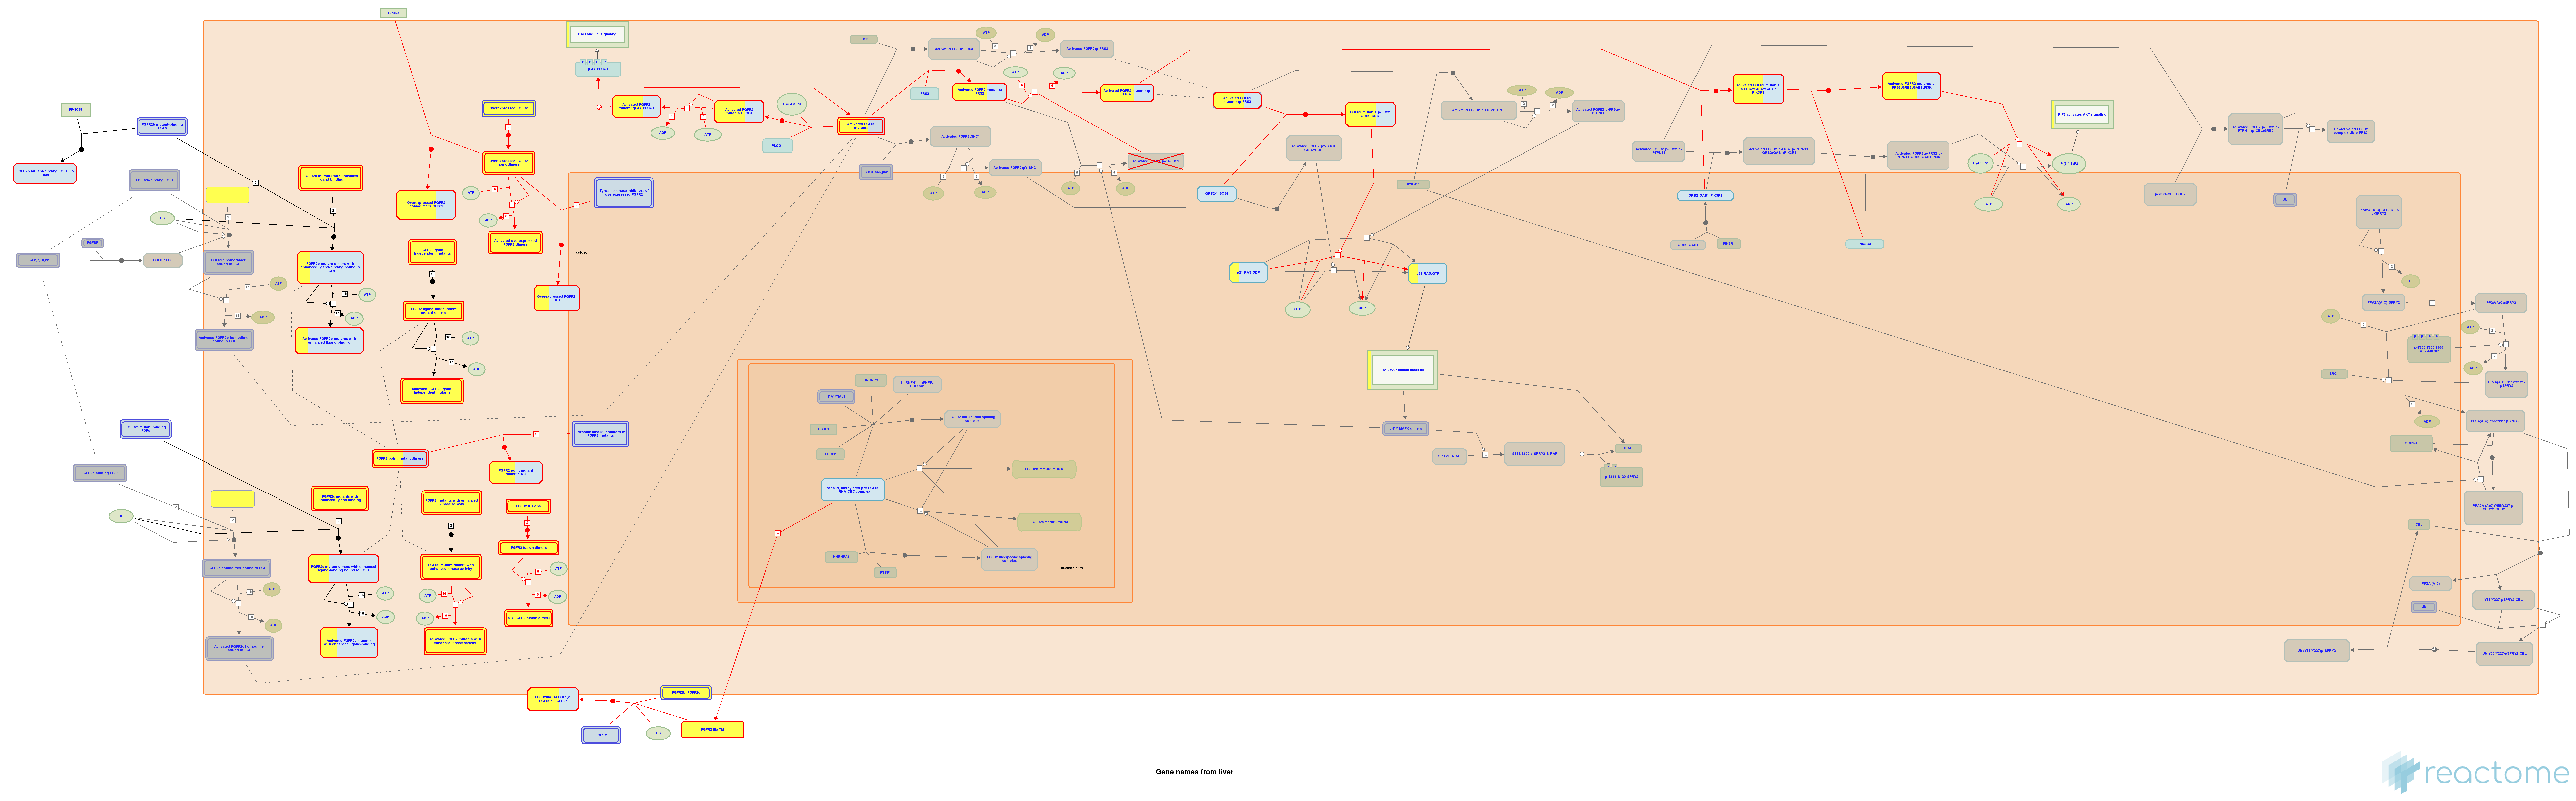

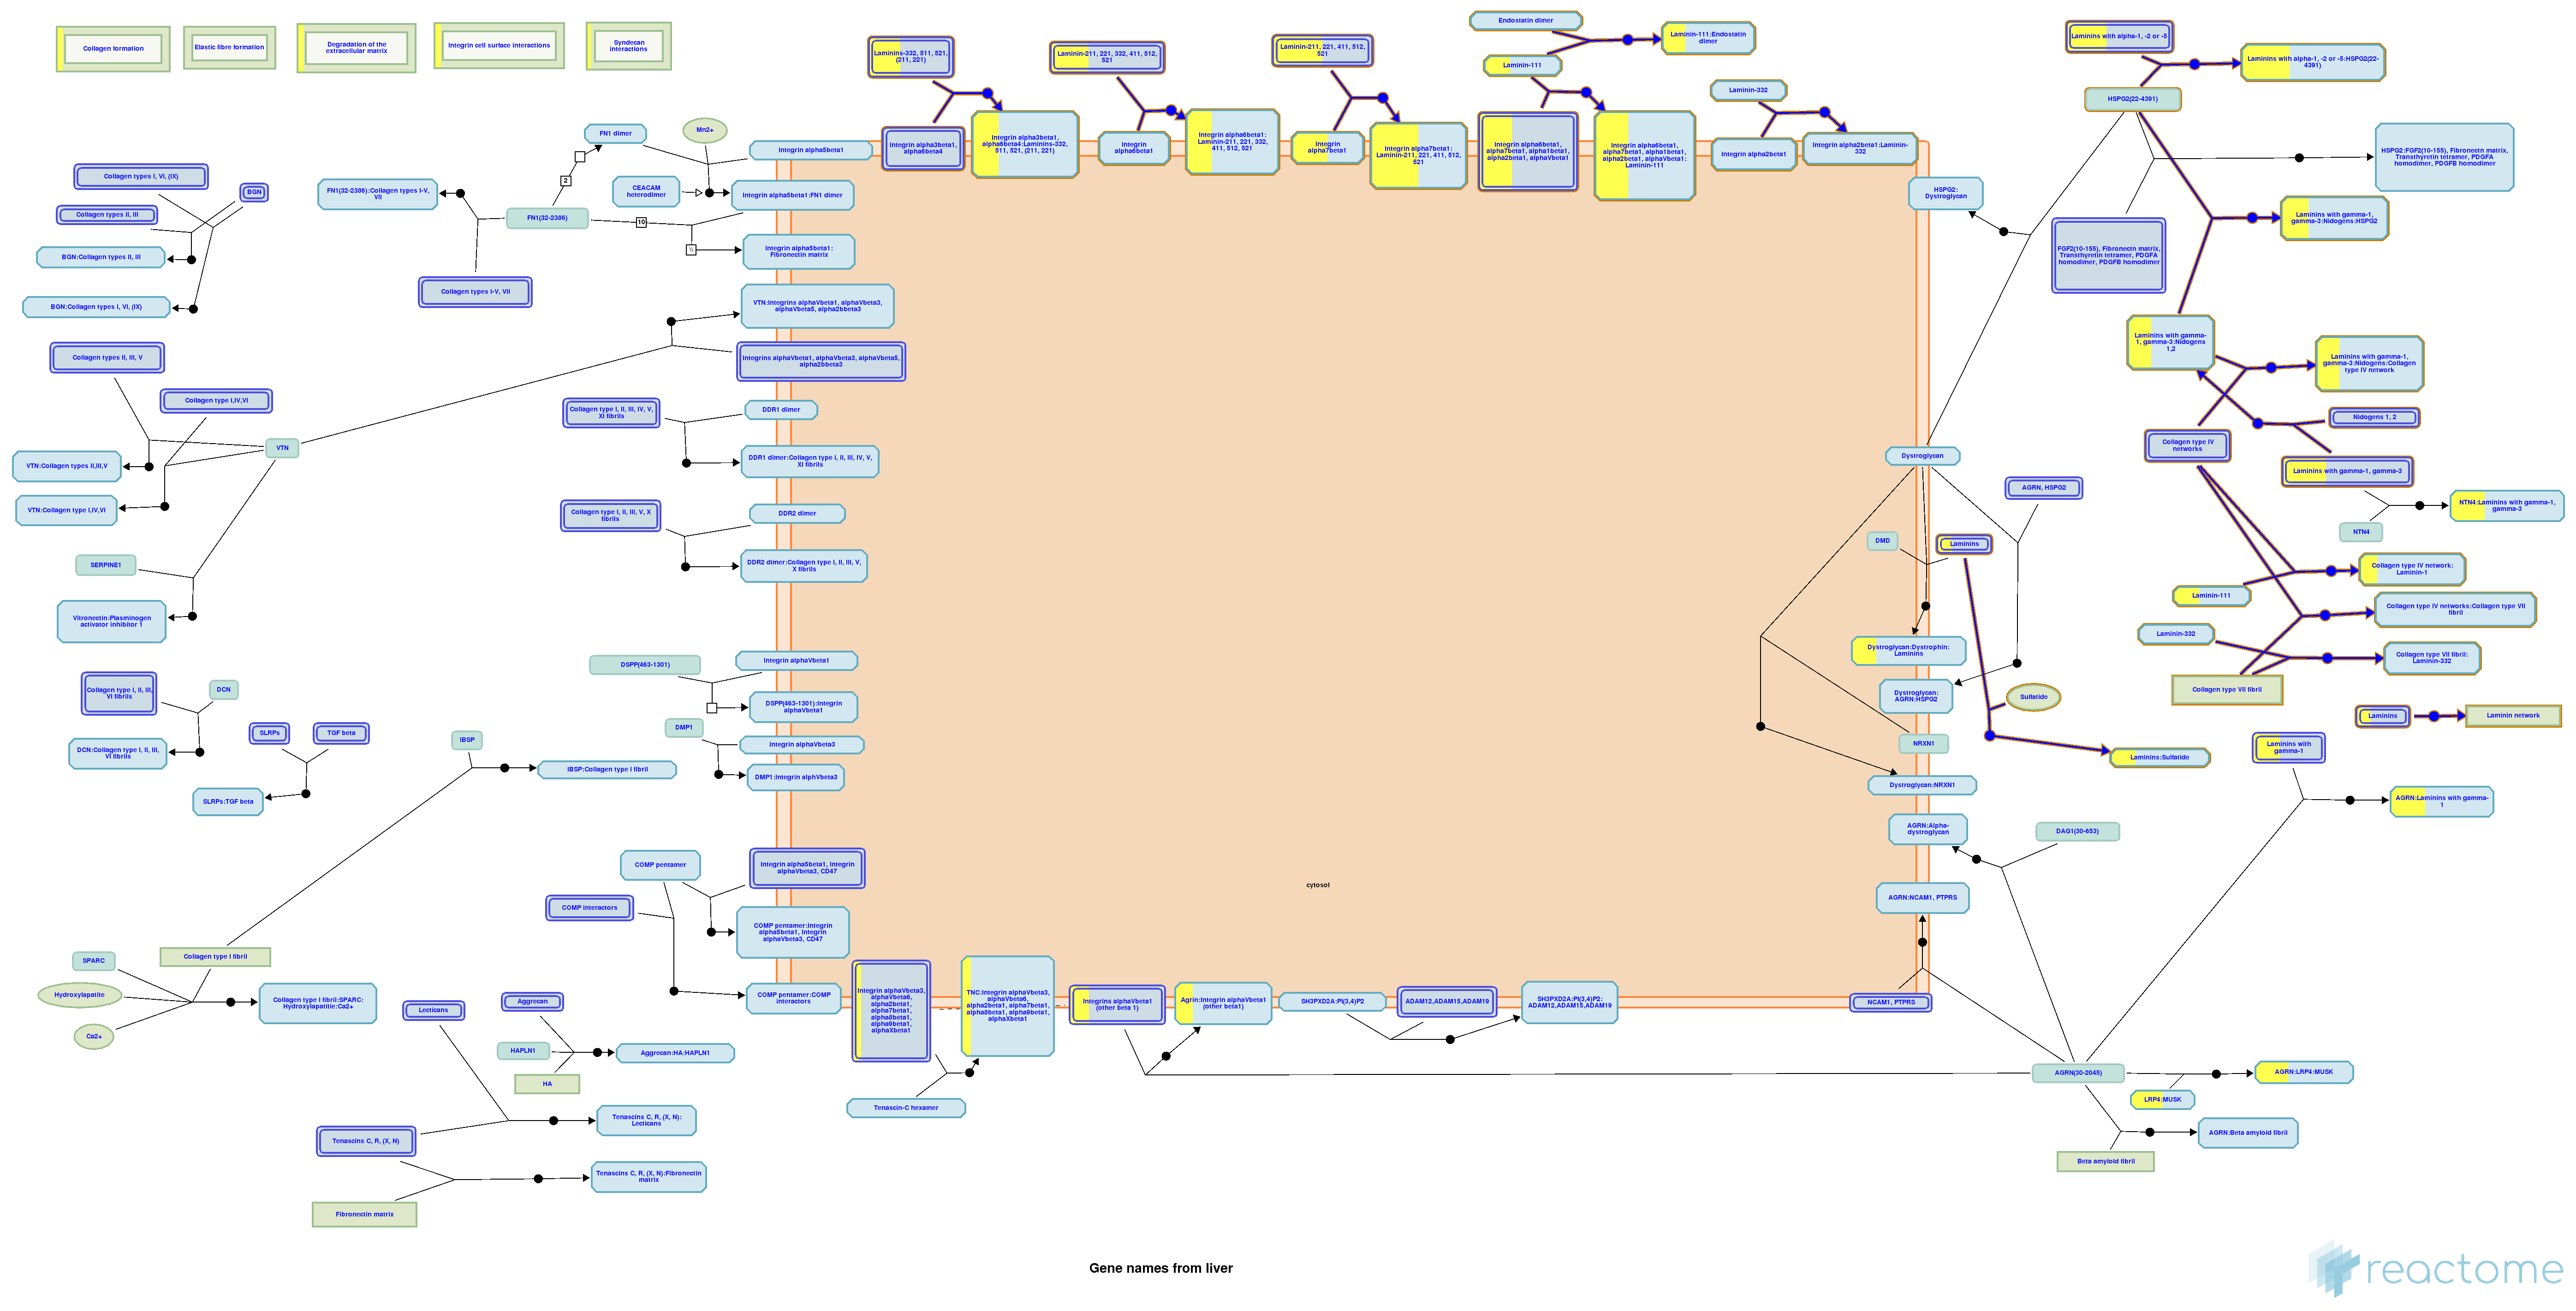

In [12]:
for stId in pathways:
    filename = os.path.join('img', stId + '.' + ext)
    display(Image(filename))

## Bonus tip
If you have read till this point, you deserve a prize.
Something interesting about diagram exporter is that you can embed diagrams dinamically using html code. The diagram will be generated on the run.

In [20]:
display(HTML("<img src=https://reactomerelease.oicr.on.ca/ContentService/exporter/diagram/R-HSA-169911.png?quality=5&diagramProfile=Modern>"))